# Operaciones aritméticas

In [63]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [64]:
def process_image(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    return img

In [65]:
spot = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/spot.png')
rondelle = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/rondelle.png')

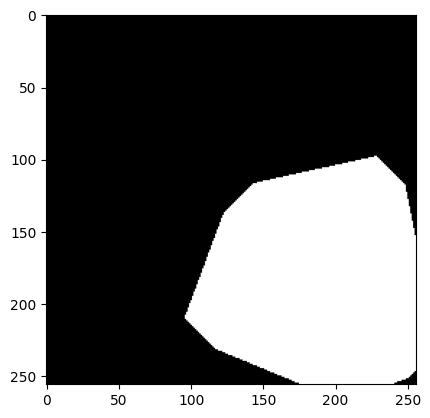

In [57]:
plt.imshow(spot, cmap='gray')

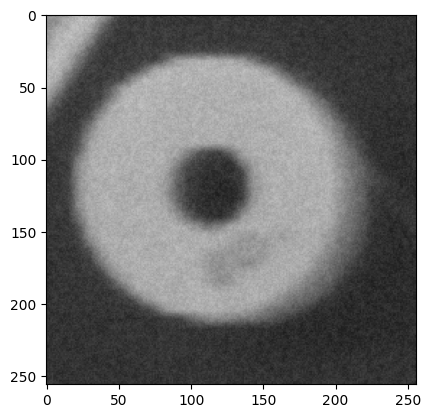

In [58]:
plt.imshow(rondelle, cmap='gray')

# 16 Bits Images

In [59]:
def process_image_16_bits(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_ANYDEPTH)
    return img

In [60]:
spot_16_bits = process_image_16_bits('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/spot.png')
rondelle_16_bits = process_image_16_bits('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/rondelle.png')

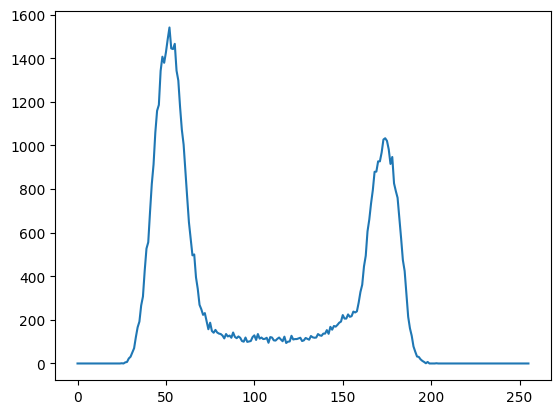

In [36]:
hist = cv2.calcHist([rondelle_16_bits], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

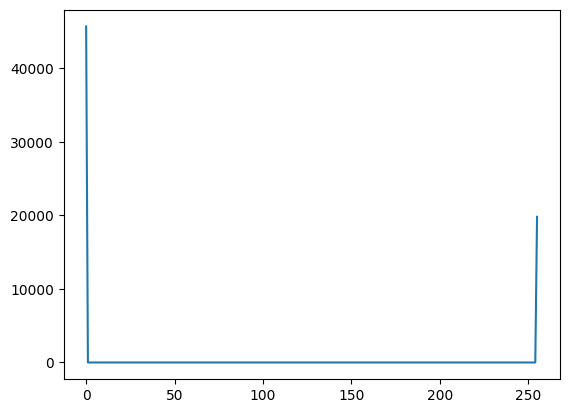

In [37]:
hist = cv2.calcHist([spot_16_bits], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

# Explicación

En el primer histograna se puede observar que la imagen rondelle tiene una distribución de grises entre los tonos oscuros (negros) y los blancos. Mientras que los tonos medios no predominan pero si estan presentes.

En el segundo histograma se puede observar que la imagen spot tiene una distribución de grises alta tanto en el negro y en el blanco. Esto debido a que en la imagen es posible evidenciar solo dos colores, el blanco que corresponde a la figura y el negro que corresponde al fondo de la imagen.

# Operacion  de adición 

In [61]:
add_image =  cv2.add(rondelle, spot)

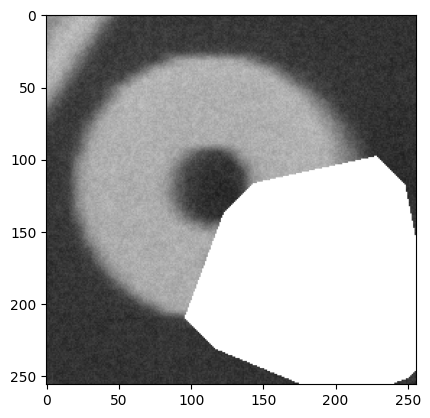

In [62]:
plt.imshow(add_image, cmap='gray')

## Histograma

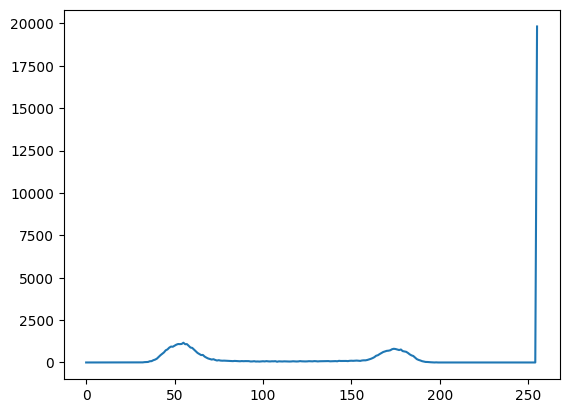

In [40]:
hist = cv2.calcHist([add_image], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

## Explicación

Una vez aplicada la operación de suma de rondelle a spot podemos observar que en el histograma, el pico de grises se da en los colores blancos, mientras que hay una presencia reducida de grises en 50 y en el rango 150 a 200.

# Operacion  de sustracción

In [66]:
sub_image =  cv2.subtract(rondelle, spot)

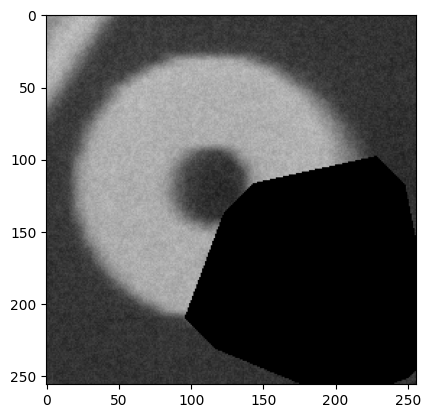

In [67]:
plt.imshow(sub_image)

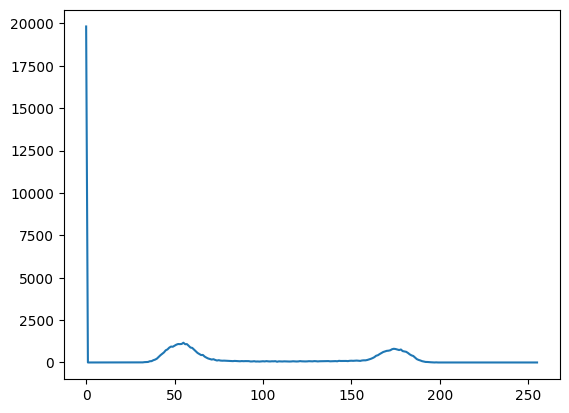

In [68]:
hist = cv2.calcHist([sub_image], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

In [69]:
sub_image =  cv2.subtract(spot, rondelle)

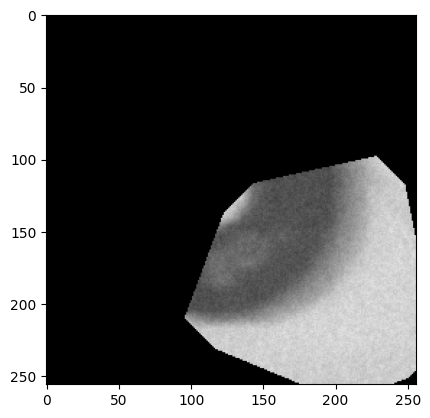

In [70]:
plt.imshow(sub_image)

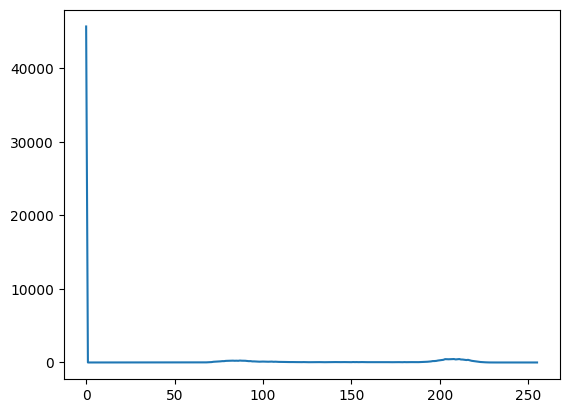

In [71]:
hist = cv2.calcHist([sub_image], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

¿Cómo afecta al resultado la inversión de los operandos?

En este caso la inversión de los operandos genero una dominancia del color negro en ambas imagenes. Esto se comprobo tambien al observar los histogramas de cada una de las imagenes producidas. Por ejemplo, la resta de rondelle a spot genero el inverso del histograma de la suma entre estas imagenes. Por ultimo, en la resta de spot a rondelle se pudo tambien observar un predominancia del negro, teniendo un pico en 0 y una distribución minima de grises en 100 y en 200.

# Explicación

Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?

En este caso, sí sería posible obtener una aproximación del histograma resultante al realizar estas operaciones. Como se ha observado, en la suma de dos imágenes, el histograma tiende a desplazarse hacia valores más altos, mientras que en la resta, se desplaza hacia valores más bajos